# Finding German Articles of Nouns with Spacy NLP
In German language there are three definite articles "der, die, das" (Eng. the) of common nouns. Those are named as "Artikel" (Eng. article) in German and often associated to gender information of noun. In "spacy" tokenized word's morphemes this property named as "Gender" <sup>[1]</sup>.

<br/>

<details>
<summary>Click to expand details about articles</summary>
[1] Contrary to populer belief, this information mostly doesn't give a real gender distinguishing feature like man (der, masculine), woman (die, feminine) or object have no gender (das, neutral).There are too much exceptional circumstances like "das Mädchen" (girl), or "der Fenster" (window). Often, it is possible to find article of noun by its suffix. E.g. nouns with ending "-heit", "-keit" generally have article "die". But almost always there are at least a few exceptions.
</details>

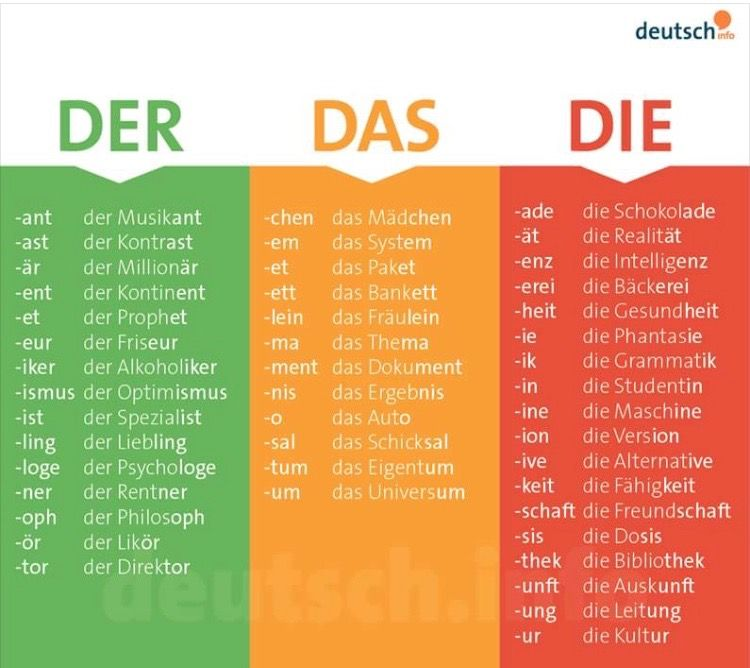

Install spacy and download model (see also https://spacy.io/models)

In [ ]:
%pip install spacy

In [ ]:
!python -m spacy download de_core_news_md

Import spacy and load model

In [1]:
import spacy
nlp = spacy.load("de_core_news_md")

In [2]:
import de_core_news_md
nlp = de_core_news_md.load()

In [3]:
test_dataset = (
    ("Musikant", "m"), ("Mädchen", "n"), ("Schokolade", "f"),
    ("Kontrast", "m"), ("System", "n"), ("Realität", "f"),
    ("Millionär", "m"), ("Paket", "n"), ("Intelligenz", "f"),
    ("Kontinent", "m"), ("Bankett", "n"), ("Bäckerei", "f"),
    ("Prophet", "m"), ("Fräulein", "n"), ("Gesundheit", "f"),
    ("Friseur", "m"), ("Thema", "n"), ("Phantasie", "f"),
    ("Alkoholiker", "m"), ("Dokument", "n"), ("Grammatik", "f"),
    ("Optimismus", "m"), ("Ergebnis", "n"), ("Studentin", "f"),
    ("Spezialist", "m"), ("Auto", "n"), ("Maschine", "f"),
    ("Liebling", "m"), ("Schicksal", "n"), ("Version", "f"),
    ("Psychologe", "m"), ("Eigentum", "n"), ("Alternative", "f"),
    ("Rentner", "m"), ("Universum", "n"), ("Fähigkeit", "f"),
    ("Philosoph", "m"), ("Freundschaft", "f"),
    ("Likör", "m"), ("Dosis", "f"),
    ("Direktor", "m"), ("Bibliothek", "f"),
    ("Auskunft", "f"), ("Leitung", "f"), ("Kultur", "f"),
)

In [4]:
test_nouns, test_articles = [ w[0] for w in test_dataset ], [ w[1] for w in test_dataset ]

Tokenize and lemmatize text

In [5]:
matching = 0
mismatching = 0

for noun in test_nouns:
  w = nlp(noun)[0]
  word = w.text
  word_type = w.pos_
  predicted_article = w.morph.get("Gender")
  original_article = test_articles[test_nouns.index(word)]
  matched = False if len(predicted_article) == 0 else predicted_article[0].lower()[0] == original_article
  tick = "✅" if matched else "❌"

  if matched: matching += 1
  else: mismatching += 1

  print(f"{word:12} {word_type:5} {original_article:3} {str(predicted_article):10} {tick}")

Musikant     NOUN  m   ['Masc']   ✅
Mädchen      NOUN  n   ['Neut']   ✅
Schokolade   NOUN  f   ['Fem']    ✅
Kontrast     NOUN  m   ['Masc']   ✅
System       NOUN  n   ['Neut']   ✅
Realität     NOUN  f   ['Fem']    ✅
Millionär    NOUN  m   ['Masc']   ✅
Paket        NOUN  n   ['Neut']   ✅
Intelligenz  NOUN  f   ['Fem']    ✅
Kontinent    NOUN  m   ['Masc']   ✅
Bankett      NOUN  n   ['Neut']   ✅
Bäckerei     NOUN  f   ['Fem']    ✅
Prophet      NOUN  m   ['Masc']   ✅
Fräulein     PROPN n   ['Neut']   ✅
Gesundheit   NOUN  f   ['Fem']    ✅
Friseur      NOUN  m   ['Masc']   ✅
Thema        NOUN  n   ['Neut']   ✅
Phantasie    NOUN  f   ['Fem']    ✅
Alkoholiker  NOUN  m   ['Masc']   ✅
Dokument     NOUN  n   ['Neut']   ✅
Grammatik    NOUN  f   ['Fem']    ✅
Optimismus   NOUN  m   ['Masc']   ✅
Ergebnis     NOUN  n   ['Neut']   ✅
Studentin    NOUN  f   ['Fem']    ✅
Spezialist   NOUN  m   ['Masc']   ✅
Auto         NOUN  n   ['Neut']   ✅
Maschine     NOUN  f   ['Fem']    ✅
Liebling     NOUN  m   ['Mas

Results

In [6]:
print(f"Matched {matching} ({matching/len(test_nouns)*100:.2f}%)")
print(f"Mismatched {mismatching} ({mismatching/len(test_nouns)*100:.2f}%)")

Matched 45 (100.00%)
Mismatched 0 (0.00%)
